In [1]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
import pandas as pd
df=pd.read_csv("mobile-samsung.csv")
df

,title,rating,body
0,Horrible product,2.0,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3.0,Camera quality is low
2,Overall,4.0,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1.0,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1.0,"Not worth buying....faulty software, poor disp..."
...,...,...,...
4995,Wonderful brick,5.0,A bit heavy but otherwise a phone from the fut...
4996,Good,4.0,Nice at this price point
4997,मस्त आहे,4.0,Normal use without havy gaming.. Best phone wi...
4998,Better in camera,3.0,All is good .. better camera quality


In [3]:
df.isna().sum()

title     0
rating    0
body      5
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.shape

(4995, 3)

In [6]:
# removes all the punctuations ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
import string
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [7]:
def text_process(df):
    df['body']=df['body'].apply(lambda x: remove_punctuation(x.lower())) # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
    stemmer = PorterStemmer() # stemming
    words = stopwords.words("english") # stop words example: "the, I, our etc"
    df['cleaned_reviews']= df['body'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() 
                                                                if i not in words]).lower())
    return df

In [8]:
text_process(df)

C:\Users\vinis\AppData\Local\Temp/ipykernel_10004/3750996924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body']=df['body'].apply(lambda x: remove_punctuation(x.lower())) # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
C:\Users\vinis\AppData\Local\Temp/ipykernel_10004/3750996924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews']= df['body'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",

,title,rating,body,cleaned_reviews
0,Horrible product,2.0,very disappointed with the overall performance...,disappoint overal perform samsung
1,Camera quality is not like 48 megapixel,3.0,camera quality is low,camera qualiti low
2,Overall,4.0,got the mobile on the launch datebattery must ...,got mobil launch datebatteri must appreciatedc...
3,A big no from me,1.0,1 it doesnt work with 50ghz wifi frequency 24g...,doesnt work ghz wifi frequenc ghz old school c...
4,Put your money somewhere else,1.0,not worth buyingfaulty software poor display q...,worth buyingfaulti softwar poor display qualit...
...,...,...,...,...
4995,Wonderful brick,5.0,a bit heavy but otherwise a phone from the fut...,bit heavi otherwis phone futur great spec dont...
4996,Good,4.0,nice at this price point,nice price point
4997,मस्त आहे,4.0,normal use without havy gaming best phone with...,normal use without havi game best phone samsun...
4998,Better in camera,3.0,all is good better camera quality,good better camera qualiti


In [9]:
df1=df[['rating','cleaned_reviews']]

In [10]:
df1

,rating,cleaned_reviews
0,2.0,disappoint overal perform samsung
1,3.0,camera qualiti low
2,4.0,got mobil launch datebatteri must appreciatedc...
3,1.0,doesnt work ghz wifi frequenc ghz old school c...
4,1.0,worth buyingfaulti softwar poor display qualit...
...,...,...
4995,5.0,bit heavi otherwis phone futur great spec dont...
4996,4.0,nice price point
4997,4.0,normal use without havi game best phone samsun...
4998,3.0,good better camera qualiti


In [11]:
def ratings_to_categorical(x):
    if x == 5.0 or x==4.0:
        return "Positive"
    if x==3.0:
        return "Neutral" 
    return "Negative"

In [12]:
df1['category']=df1['rating'].apply(ratings_to_categorical)
df1

C:\Users\vinis\AppData\Local\Temp/ipykernel_10004/3556611186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category']=df1['rating'].apply(ratings_to_categorical)


,rating,cleaned_reviews,category
0,2.0,disappoint overal perform samsung,Negative
1,3.0,camera qualiti low,Neutral
2,4.0,got mobil launch datebatteri must appreciatedc...,Positive
3,1.0,doesnt work ghz wifi frequenc ghz old school c...,Negative
4,1.0,worth buyingfaulti softwar poor display qualit...,Negative
...,...,...,...
4995,5.0,bit heavi otherwis phone futur great spec dont...,Positive
4996,4.0,nice price point,Positive
4997,4.0,normal use without havi game best phone samsun...,Positive
4998,3.0,good better camera qualiti,Neutral


In [13]:
df1['category'].value_counts()

Positive    2512
Negative    1841
Neutral      642
Name: category, dtype: int64

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import en_core_web_sm  
import spacy
import re
nlp = spacy.load("en_core_web_md")

In [16]:
def normalize(msg):
    msg = re.sub('[^A-Za-z]+', ' ', msg) #remove special character and intergers
    doc = nlp(msg)
    res=[]
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2): #word filteration
            pass
        else:
            res.append(token.lemma_.lower())
    return res

df1["cleaned_reviews_1"] = df1["cleaned_reviews"].apply(normalize)
df1.head()

,rating,cleaned_reviews,category,cleaned_reviews_1
0,2.0,disappoint overal perform samsung,Negative,"[disappoint, overal, perform, samsung]"
1,3.0,camera qualiti low,Neutral,"[camera, qualiti, low]"
2,4.0,got mobil launch datebatteri must appreciatedc...,Positive,"[get, mobil, launch, datebatteri, appreciatedc..."
3,1.0,doesnt work ghz wifi frequenc ghz old school c...,Negative,"[work, ghz, wifi, frequenc, ghz, old, school, ..."
4,1.0,worth buyingfaulti softwar poor display qualit...,Negative,"[worth, buyingfaulti, softwar, poor, display, ..."


In [17]:
# words count
from collections import Counter
words_collection = Counter([words for subtext in df1['cleaned_reviews_1'] for words in subtext])
most_common = pd.DataFrame(words_collection.most_common(50))
most_common.columns = ['most_common_word','count']
most_common

,most_common_word,count
0,phone,3419
1,good,3066
2,camera,1997
3,batteri,1527
4,qualiti,1450
5,samsung,1320
6,mobil,1240
7,use,993
8,buy,915
9,product,908


<AxesSubplot:title={'center':'Top 30 words'}, xlabel='most_common_word'>

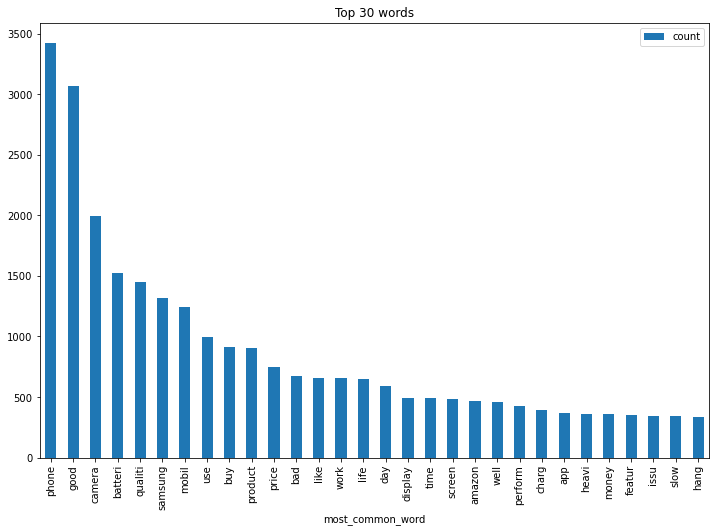

In [18]:
#Visualizing results (Barchart for top 30 words)
most_common[0:30].plot.bar(x='most_common_word',figsize=(12,8),title='Top 30 words')

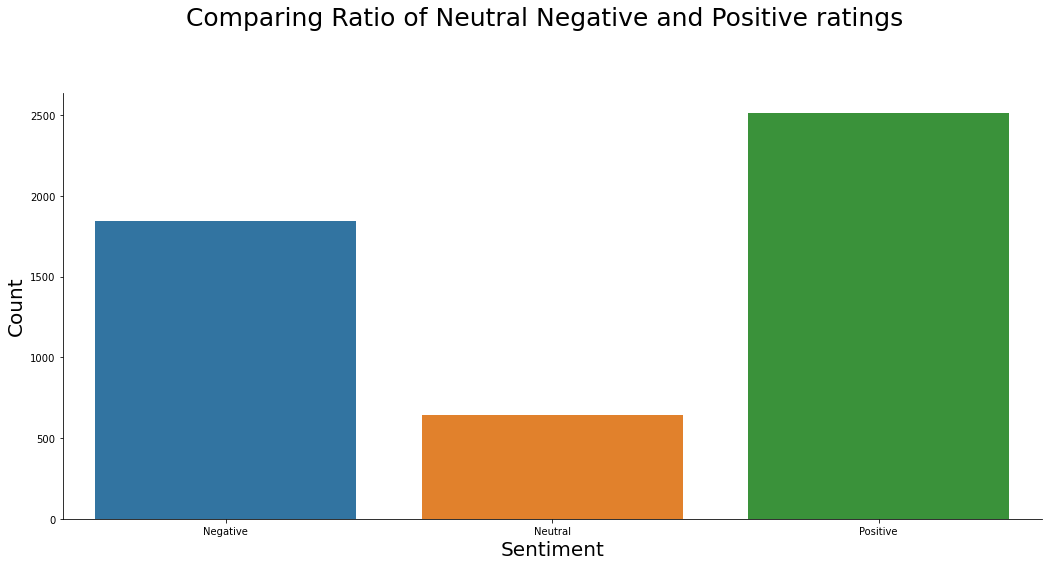

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "category", data = df1)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [21]:
neu=df1[df1["category"] == "Neutral"]["cleaned_reviews"]
neg=df1[df1["category"] == "Negative"]["cleaned_reviews"]
pos=df1[df1["category"] == "Positive"]["cleaned_reviews"]

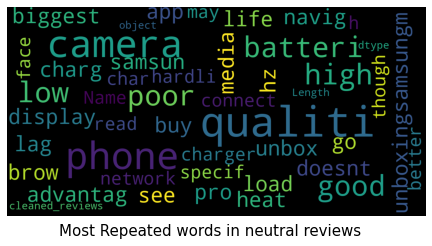

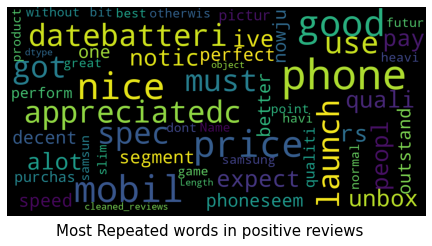

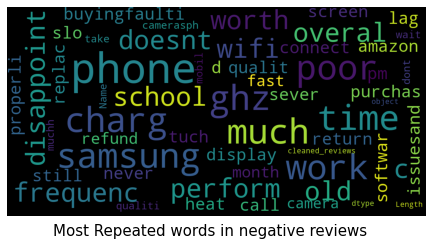

In [22]:
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [25]:
from textblob import TextBlob

In [26]:
df1['polarity'] = df1['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1.head()

,rating,cleaned_reviews,category,cleaned_reviews_1,polarity
0,2.0,disappoint overal perform samsung,Negative,"[disappoint, overal, perform, samsung]",0.000000
1,3.0,camera qualiti low,Neutral,"[camera, qualiti, low]",0.000000
2,4.0,got mobil launch datebatteri must appreciatedc...,Positive,"[get, mobil, launch, datebatteri, appreciatedc...",0.137500
3,1.0,doesnt work ghz wifi frequenc ghz old school c...,Negative,"[work, ghz, wifi, frequenc, ghz, old, school, ...",0.078788
4,1.0,worth buyingfaulti softwar poor display qualit...,Negative,"[worth, buyingfaulti, softwar, poor, display, ...",-0.050000


In [27]:
top2_words = get_top_n2_words(df1["cleaned_reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,camera qualiti,629
1,batteri life,534
2,good phone,211
3,price rang,179
4,dont buy,178
5,qualiti good,176
6,good batteri,172
7,batteri backup,169
8,good camera,169
9,phone good,152


[Text(0, 0, 'camera qualiti'),
 Text(1, 0, 'batteri life'),
 Text(2, 0, 'good phone'),
 Text(3, 0, 'price rang'),
 Text(4, 0, 'dont buy'),
 Text(5, 0, 'qualiti good'),
 Text(6, 0, 'good batteri'),
 Text(7, 0, 'batteri backup'),
 Text(8, 0, 'good camera'),
 Text(9, 0, 'phone good'),
 Text(10, 0, 'finger print'),
 Text(11, 0, 'camera good'),
 Text(12, 0, 'life good'),
 Text(13, 0, 'valu money'),
 Text(14, 0, 'gb ram'),
 Text(15, 0, 'also good'),
 Text(16, 0, 'budget phone'),
 Text(17, 0, 'use phone'),
 Text(18, 0, 'media could'),
 Text(19, 0, 'could load')]

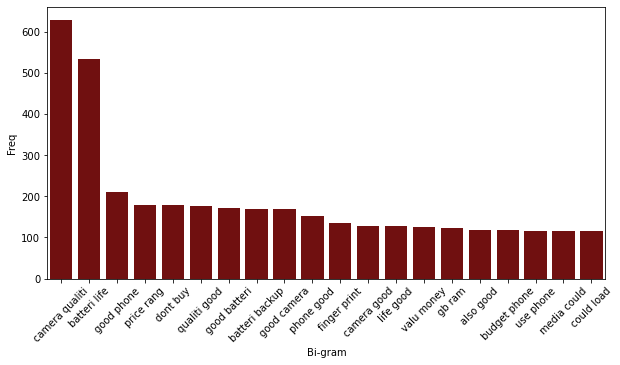

In [28]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"],color = 'maroon')
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [29]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [30]:
top3_words = get_top_n3_words(df["cleaned_reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(20)

,Tri-gram,Freq
0,media could load,115
1,batteri life good,112
2,camera qualiti good,104
3,good batteri life,81
4,good camera qualiti,58
5,camera qualiti poor,54
6,hz refresh rate,41
7,phone price rang,41
8,finger print reader,40
9,batteri life camera,36


[Text(0, 0, 'media could load'),
 Text(1, 0, 'batteri life good'),
 Text(2, 0, 'camera qualiti good'),
 Text(3, 0, 'good batteri life'),
 Text(4, 0, 'good camera qualiti'),
 Text(5, 0, 'camera qualiti poor'),
 Text(6, 0, 'hz refresh rate'),
 Text(7, 0, 'phone price rang'),
 Text(8, 0, 'finger print reader'),
 Text(9, 0, 'batteri life camera'),
 Text(10, 0, 'pleas dont buy'),
 Text(11, 0, 'finger print sensor'),
 Text(12, 0, 'good batteri backup'),
 Text(13, 0, 'batteri backup good'),
 Text(14, 0, 'gb ram gb'),
 Text(15, 0, 'camera qualiti also'),
 Text(16, 0, 'dont buy phone'),
 Text(17, 0, 'qualiti also good'),
 Text(18, 0, 'phone camera qualiti'),
 Text(19, 0, 'good phone price')]

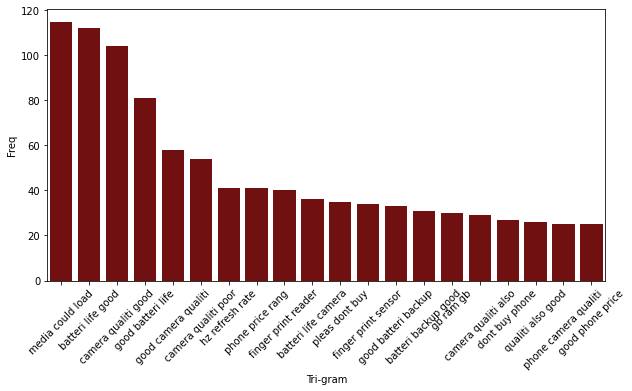

In [31]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"], color = 'maroon')
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

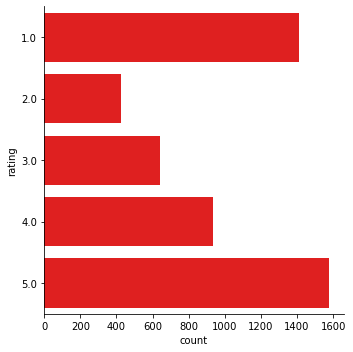

In [32]:
sns.catplot(y = 'rating' , kind = 'count',data = df, color =  'red')

In [33]:
df1['polarity'] = df1['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


Text(0.5, 1.0, 'Histogram of polarity')

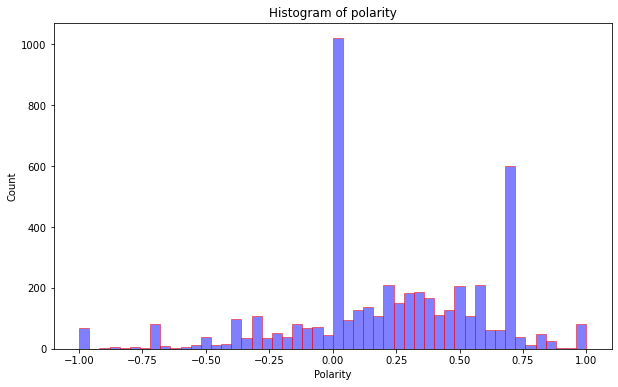

In [34]:
num_bins = 50
plt.figure(figsize=(10,6))
plt.hist(df1.polarity, num_bins, alpha=0.5, color = 'blue', ec = 'red')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')

In [35]:
df2 = pd.DataFrame(df1)
df2.to_csv(r'updated_mobile_data.csv', index=False)